**DAT405-Home assignment 3**

**Authors-Hariharan Gopinath and Amogha Udayakumar**

 **Group 24**

 **The average working hours each person spent is 15 hours**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/DAT405/data_all.csv")

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Show the distribution of phi and psi combinations using:**

**a) Scatter plot**

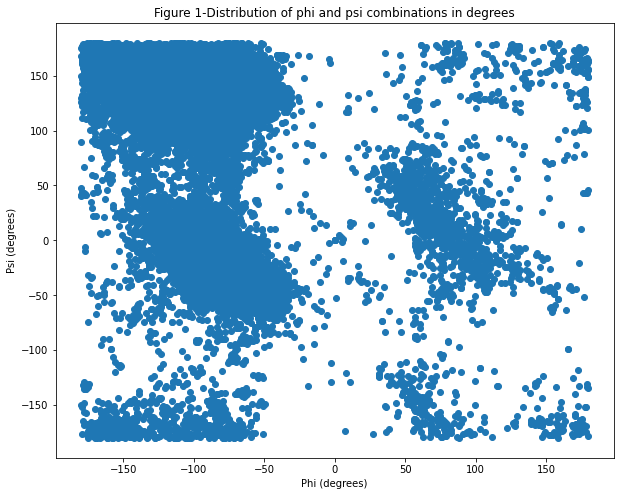

In [4]:
fig,ax=plt.subplots(figsize=(10,8))
x=df['phi'].values
y=df['psi'].values

ax.scatter(x, y)
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Figure 1-Distribution of phi and psi combinations in degrees')
plt.show()


**b) Heatmap**

Figure 2- Heat map for Distribution of phi and psi in degrees 


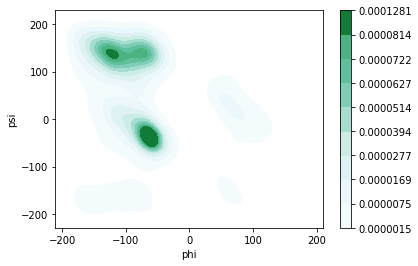

In [5]:
import seaborn as sns
 #A kernel density estimate (KDE) 
sns.kdeplot(df['phi'], df['psi'], cmap="BuGn",cbar=True, shade=True, shade_lowest=False)
print('Figure 2- Heat map for Distribution of phi and psi in degrees ')


The above figure 2 shows the heatmap of the phi and psi from the dataset.
From the heatmap, we can see that there are 2 dark green density place and some light green shades in the right middle of the graph. This heat map is matches with the figure 1 because from that fighure, we can see there are 2 large dense clusters in the left side of the figure and other points are spreaded in unequally.  The dark green cluster in the figure 2 indicates that the density at that place is larger than the right cluster. From this, we can say that large number of points located in the left corner cluster than the other clusters.

**2)K-means clustering method to cluster the phi and psi angle combinations**

**a) Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.**

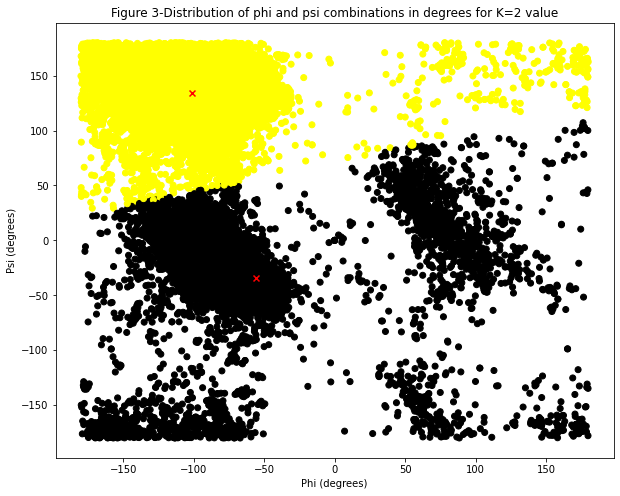

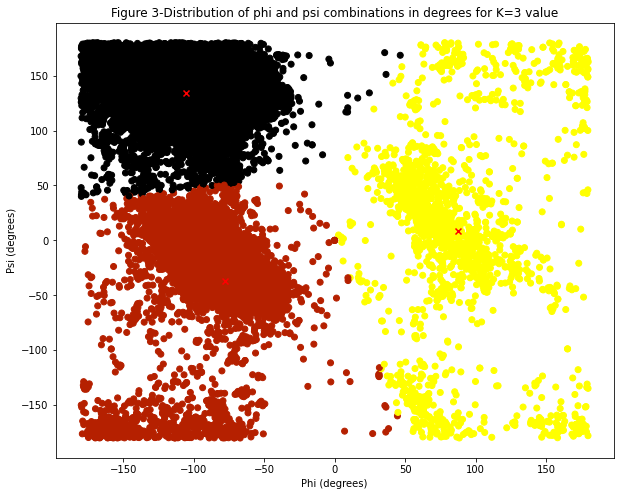

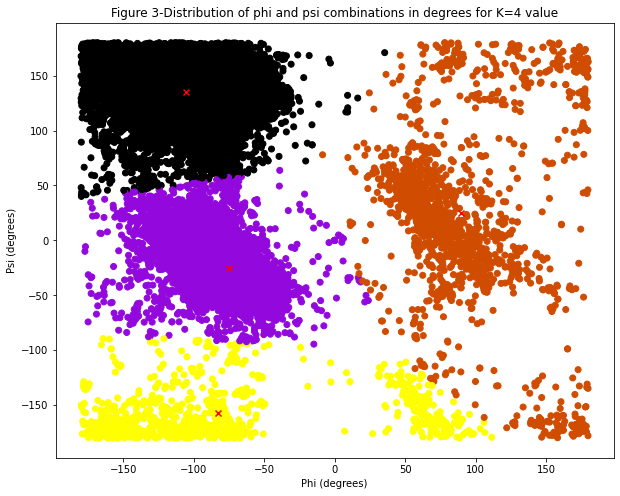

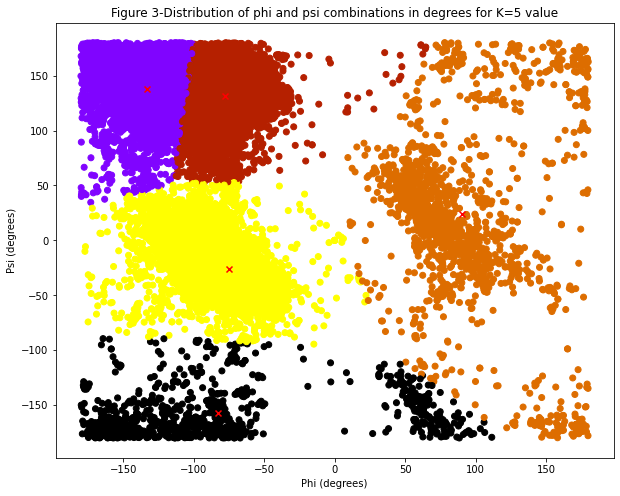

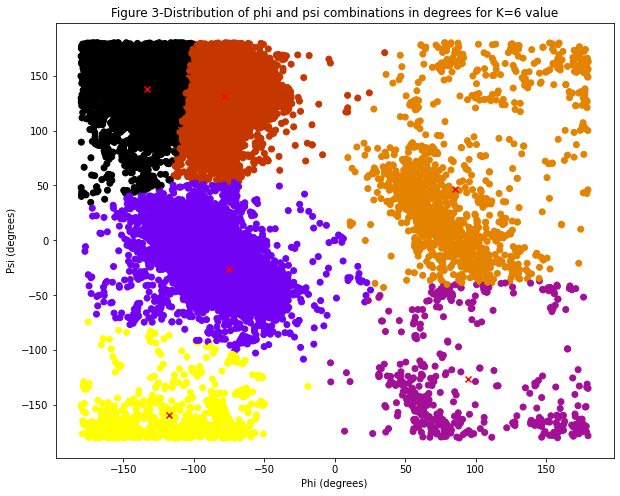

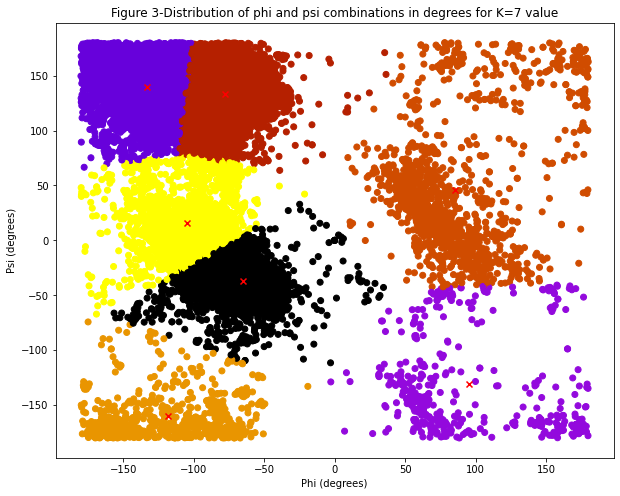

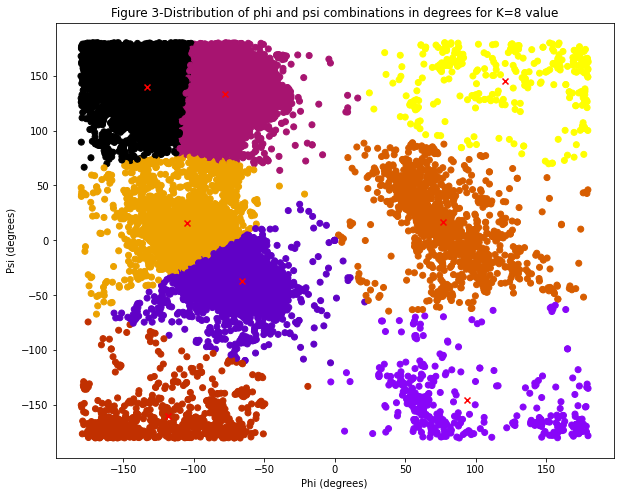

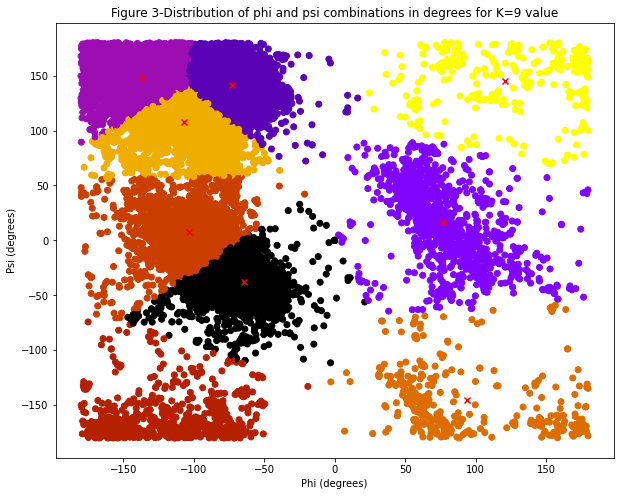

In [6]:
from sklearn.preprocessing import StandardScaler

X_values = df[['phi', 'psi']].values
# Different K values
K = [*range(2, 10, 1)]


#one plot for each k values
inertias=[]
for j in K:
    plt.figure(figsize=(10,8))

    K_mean = KMeans(n_clusters=j, random_state=0).fit(X_values)
    inertias.append(K_mean.inertia_)

    K_predict = K_mean.predict(X_values)

    # Scatter Plotting 
    plt.scatter(X_values[:,0], X_values[:,1],c=K_predict, cmap='gnuplot')

    # Perform K-Means clustering plot   
    plt.scatter(K_mean.cluster_centers_[:, 0], K_mean.cluster_centers_[:, 1],  c='red', marker='x')
    
    plt.xlabel('Phi (degrees)')
    plt.ylabel('Psi (degrees)')

    plt.title('Figure 3-Distribution of phi and psi combinations in degrees for K={0} value'.format(j))
    plt.show()

For this question, we used the different K values from K=1 to K=10. In the graph, we can see the plot for different k values. We can see that for k=3 and k=4, the clustering plots seems to be reasonable. Because from the plot figure 1, we can see clearly that there are 3 kinds of major clusters one in the left upper corner, second in left middle and last one is scattered in the right side of the plot. For k=3 in the above plot, the left 2 big clusters are separated with different clusters colors and with appropriate initial centroid points in it. This
separate the 3 main clusters with 3 different colors and centriods. When K=4, the same left top cluster is separated and the middle cluster is separated into 2 parts which is not that much appropriate when comparing with K=3. Further, the right corner cluster is also separated as a one cluster as same. So, the suitable value for k is 3, as it's separating the 3 main clusters well with appropriate centriods and this can be also observed from the Heatmap diagrams figure 2. 

**Elbow method**

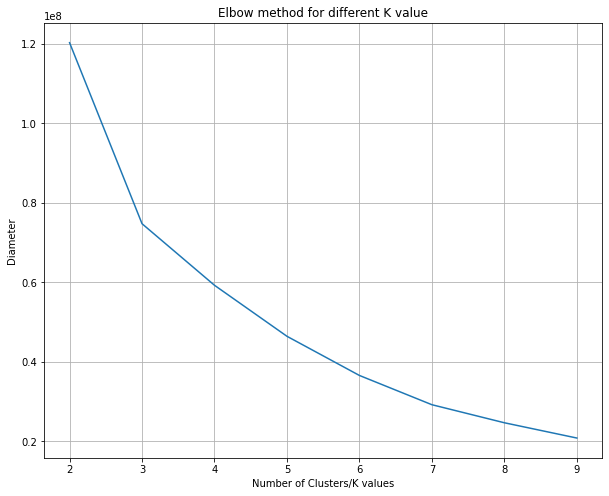

Elbow method for K values


In [7]:
plt.figure(figsize=(10,8))

plt.plot(K, inertias)
plt.xticks(K)
plt.xlabel("Number of Clusters/K values")
plt.ylabel("Diameter")
plt.title('Elbow method for different K value')

plt.grid()
plt.show()

print('Elbow method for K values')


To make this decision more approximate, we plotted the elbow method for different K values. We can clearly see from figure \ref{elbow1} that when k=3 and 4, there is a sharp change in the slope of the line and this would gives a better understanding for choosen K values.

**2 b) Cluster validation**

For Validating the clusters, we used the Silhouette Coefficient method. Silhouette Coefficient is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.
 


Here, we have plotted the Silhouette Coefficient for the different k values. From the figure below, we can see that when k=3 and k=4, the Silhouette Coefficient is high when comparing with the Silhouette Coefficient for other k values. But even though, for the K=3,4, the points are almost same and some difference are there in decimals and k=4 have more score than k=3. But for us, when seeing the clusters visually, the clusters for k=3 is seems to be reasonable.

Silhouette Coefficient for k=3 is 0.6724557848220908
Silhouette Coefficient for k=4 is 0.6674392423283723


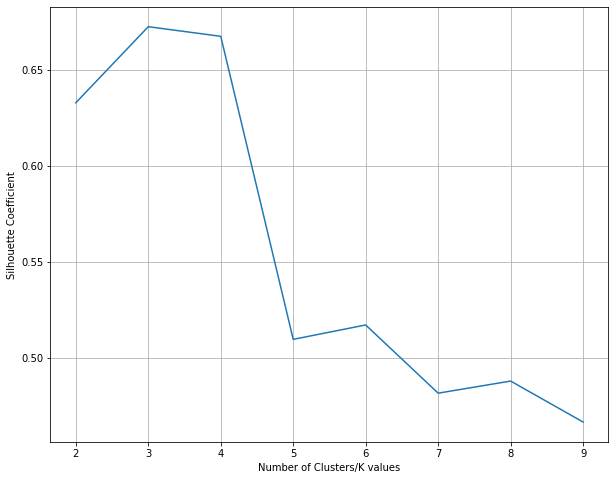

In [8]:
from sklearn import metrics


#for k=3
K_means_val = KMeans(n_clusters=3, random_state=0).fit(X_values)
labels = K_means_val.labels_

# Silhouette Coefficient between best value 1 and worst value -1
score = metrics.silhouette_score(X_values, labels, metric='euclidean')

print('Silhouette Coefficient for k=3 is',score)

#for k=4
K_means_val = KMeans(n_clusters=4, random_state=0).fit(X_values)
labels = K_means_val.labels_

# Silhouette Coefficient between best value 1 and worst value -1
score = metrics.silhouette_score(X_values, labels, metric='euclidean')

print('Silhouette Coefficient for k=4 is',score)

silhouette_coeff=[]
for i in K:
    K_means_val = KMeans(n_clusters=i, random_state=0).fit(X_values)
    labels = K_means_val.labels_
    # Silhouette Coefficient between best value 1 and worst value -1
    score = metrics.silhouette_score(X_values, labels, metric='euclidean')
    silhouette_coeff.append(score)


plt.figure(figsize=(10,8))

plt.plot(K, silhouette_coeff)
plt.xticks(K)
plt.xlabel("Number of Clusters/K values")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()


**c) Cluster found reasonable**


The clusters found in the figure 1 a) seems to be somehow reasonable but not that much to be acceptable. Because in that figure, we can see that many points are located at the outside or near the bordered edges of the plot. Also, the -360 and +360 are seems to be so far away but if you see them in degree, they are almost same once there are rotated 360 degree in positive angle. So, if we shift the points in between 0 to 360, we might get some better results when comparing with normal plot.


**2 d) rotation**

In this sub question, we need to shift or change the data points so that we will get some better results.Here, we tried one method to change the data and to rotate it in the positive degree. If we see the figure 1, all the points in the x and y axis are placed within -180 and +180 degrees. And some points in the left upper and lower corner points are almost near but there are separated by the negative degree.  Firstly, we added 230 degree to all the data points in phi to change all the data points from negative degree(left side) to the positive degree(right side). Same we doing it for y axis of Psi by adding 120 degrees to the data points. Once we have shifted the all the points to positive degree, we have to compress all the points within 360 degree. For example, some points at the 180 degree may get added with 360 and results in 540 degree which is unreasonable. To get all the points within 360, we used a modulo 360 degree usage. This simple rotate routine which normalizes an objects rotation between 0 and 360 degrees. For example, the point at 540\%360 will results in 180 degree back. By doing this, we can get all the degree points within 360 degrees.

The below plot below shows the scatter plot of the rotated and shifted data points. We can see that less points are near the border when comparing with figure 1. Further, when we plot the Silhouette Coefficient for the different k values with the improved dataset, we can see that for K=3, the Silhouette Coefficient is high and this K value will be appropriate one for this data clusters.

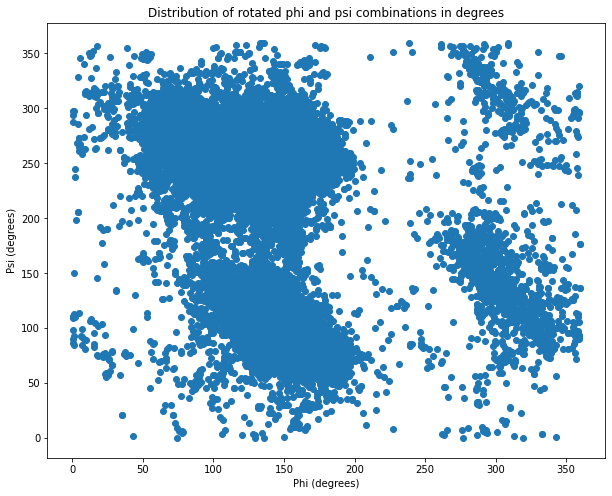

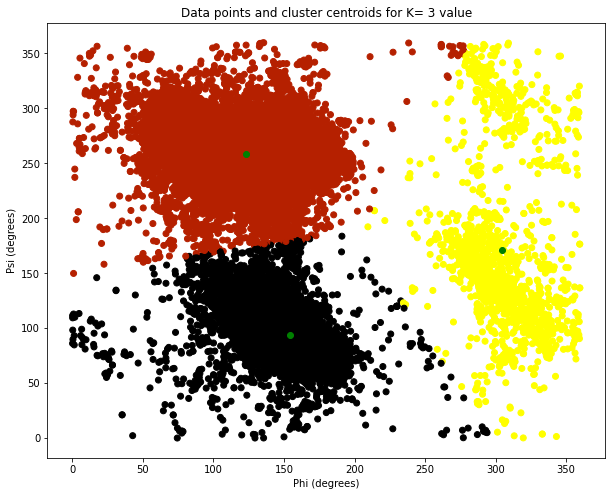

In [9]:
import numpy as np
rotated_phi = []
rotated_psi = []

x=df['phi'].values
y=df['psi'].values

#  to get positive values, add 360 degrees to all values
for i,z in enumerate(x):
    rotated_phi.append(z + 230)
    rotated_psi.append(y[i] + 120)
# Modulo 360 degrees
for i in range(len(rotated_phi)):
    rotated_phi[i] = rotated_phi[i]%360 
    rotated_psi[i] = rotated_psi[i]%360

rotated_phi=np.array(rotated_phi)
rotated_psi=np.array(rotated_psi)

fig,ax=plt.subplots(figsize=(10,8))



ax.scatter(rotated_phi, rotated_psi)
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Distribution of rotated phi and psi combinations in degrees')
plt.show()


# combining the 2 arrays with the dataframe methods
df_new = pd.DataFrame(data={"rotated phi": rotated_phi, "rotated psi": rotated_psi})
# extracting the specific values
rotated_data=df_new[['rotated phi','rotated psi']].values


plt.figure(figsize=(10,8))
K_mean = KMeans(n_clusters=3, random_state=0).fit(rotated_data)
inertias.append(K_mean.inertia_)

K_predict = K_mean.predict(rotated_data)

    # Scatter Plotting  
plt.scatter(rotated_phi,rotated_psi,c=K_predict, cmap='gnuplot')

    # Perform K-Means clustering plot   
plt.scatter(K_mean.cluster_centers_[:, 0], K_mean.cluster_centers_[:, 1],  c='green', marker='o')

plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Data points and cluster centroids for K= 3 value')
plt.show()

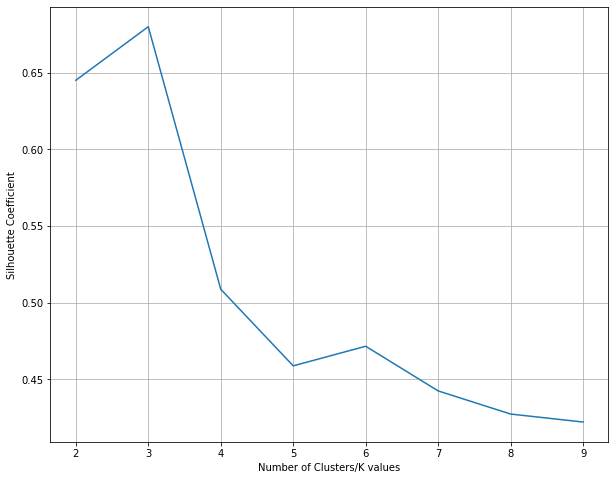

In [10]:
df_new = pd.DataFrame(data={"rotated phi": rotated_phi, "rotated psi": rotated_psi})
rotated_data=df_new[['rotated phi','rotated psi']].values
from sklearn import metrics

silhouette_coeff=[]
for i in K:
    K_means_val = KMeans(n_clusters=i, random_state=0).fit(rotated_data)
    labels = K_means_val.labels_
    # Silhouette Coefficient between best value 1 and worst value -1
    score = metrics.silhouette_score(rotated_data, labels, metric='euclidean')
    silhouette_coeff.append(score)


plt.figure(figsize=(10,8))

plt.plot(K, silhouette_coeff)
plt.xticks(K)
plt.xlabel("Number of Clusters/K values")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

Now, if we see the Silhouette Coefficient for the different values, we can see that for K=3, the Silhouette Coefficient is high as we predicted before in 2 b)

**3a.(i)the choice of the minimum number of samples in the neighbourhood for a point to be considered as a core point, and (ii) the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).**

**Note: Here eps = the maximum distance between two samples belonging to the same neighbourhood , min_samples = minimum number of samples in the neighbourhood for a point to be considered as a core point**

In [11]:
#adding rotated phi and psi columns to the dataframe
new_series1 = pd.Series(rotated_phi)
new_series2 = pd.Series(rotated_psi)

df['rotated_phi']=new_series1
df['rotated_psi']=new_series2


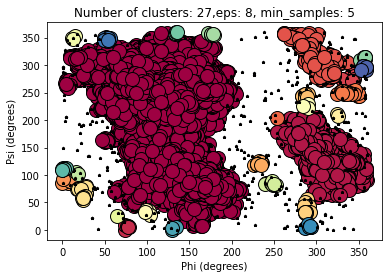

Total Number of Outliers(noise): 253


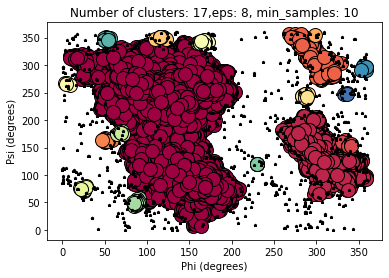

Total Number of Outliers(noise): 530


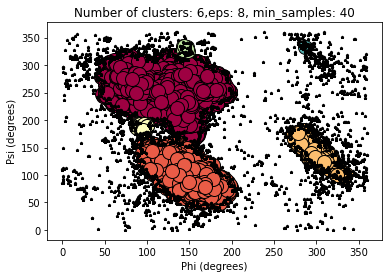

Total Number of Outliers(noise): 1958


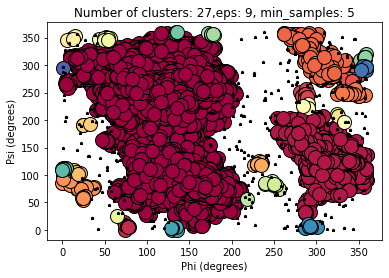

Total Number of Outliers(noise): 178


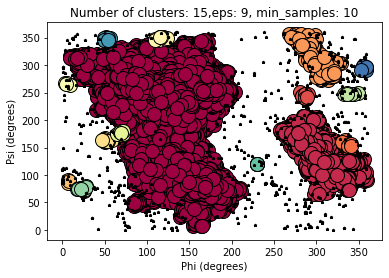

Total Number of Outliers(noise): 428


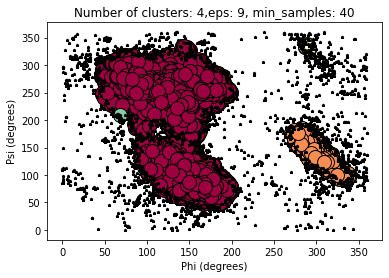

Total Number of Outliers(noise): 1619


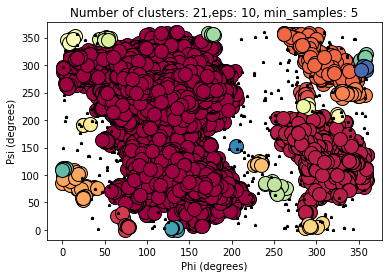

Total Number of Outliers(noise): 145


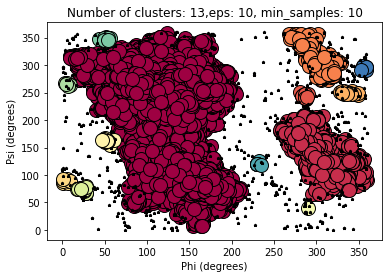

Total Number of Outliers(noise): 352


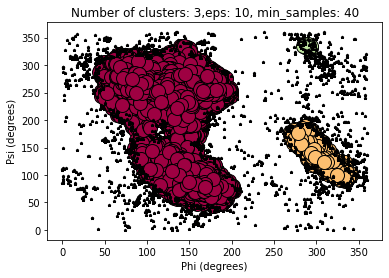

Total Number of Outliers(noise): 1397


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#DBSCAN


for i in [8,9,10]:
  for j in [5,10,40]:
      dbscan = DBSCAN(eps=i, min_samples=j).fit(rotated_data)
      core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
      core_mask[dbscan.core_sample_indices_] = True
      labels = dbscan.labels_


      no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      no_noise= list(labels).count(-1)

      # blue removed and is used for noise instead. 
      u_labels = set(labels)
      #colors
      c = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(u_labels))]
      for k, col in zip(u_labels, c):
          if k == -1:
              # Blue used for noise.
              col = [0, 0, 1, 1]

          class_member_mask = (labels == k)

          xy = rotated_data[class_member_mask & core_mask]
          plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                  markeredgecolor='k', markersize=14)

          xy = rotated_data[class_member_mask & ~core_mask]
          plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
                  markeredgecolor='k', markersize=3)

      plt.title('Number of clusters: {0},eps: {1}, min_samples: {2}'.format(no_clusters,i,j))
      plt.xlabel('Phi (degrees)')
      plt.ylabel('Psi (degrees)')
      plt.show()
      print('Total Number of Outliers(noise): %d' % no_noise)

Here ‘min_samples’ represents the minimum number of neighbors required to consider it as a core point and ‘eps’ represents the maximum distance between the furthest points in the same cluster. The choice of ‘min_samples’ and ‘eps’ was basically by trial and error method. We plugged in different values of ‘min_samples’ and ‘eps’ and checked how the clustering varies as these two values varies.

As you can see above we have shown only for few values of ‘eps’ and ‘min_samples’ but we tried for more than these values.We know that we have 3 conformations(alpha helical, beta strand and turn) and so we need to get 3 clusters. 

By using low value of ‘min_samples’ (like 5-40 ) and increasing the ‘eps’ (8-10) we see that the numbers of clusters obtained reduces and all the datapoint are clustered into one or less than we desire.

By using low values for min_samples(5-30) and  low values for ‘eps’ (5,6,7). We get many clusters where datapoint that are to be regarded as noise are formed into clusters.


After many trail and error we found that if we use high min_samples and reasonable value of eps we get our desired number of clusters that is from eps=[10,11,12] and min_sample = [80-100].For eps=10 and min_samples = [80,90,100] we see similar clusters but when eps varies between [10,11,12] the cluster sizes changes but we still get 3 clusters.
But the best combination we found was for eps=10 and min_sample=100 .


**3b. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.How many outliers are found?**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#DBSCAN
dbscan = DBSCAN(eps=10, min_samples=100).fit(rotated_data)
core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_


no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
no_noise= list(labels).count(-1)

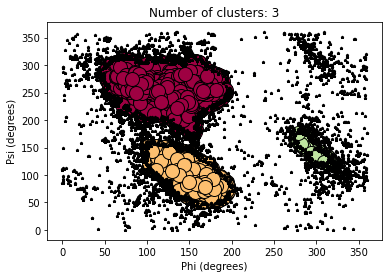

Total Number of Outliers(noise): 2604


In [14]:

# blue removed and is used for noise instead. 
u_labels = set(labels)
c = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(u_labels))]
for k, col in zip(u_labels, c):
    if k == -1:
        # Blue used for noise.
        col = [0, 0, 1, 1]

    class_member_mask = (labels == k)

    xy = rotated_data[class_member_mask & core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = rotated_data[class_member_mask & ~core_mask]
    plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.rcParams.update({'figure.figsize':(6,6),'figure.dpi':100})
plt.title('Number of clusters: %d' % no_clusters)
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.show()
print('Total Number of Outliers(noise): %d' % no_noise)

**How many outliers are found?**

In [15]:
print('Total Number of Outliers(noise): %d' % no_noise)

Total Number of Outliers(noise): 2604


**Plot a bar chart to show which amino acid residue types are most frequently outliers.**

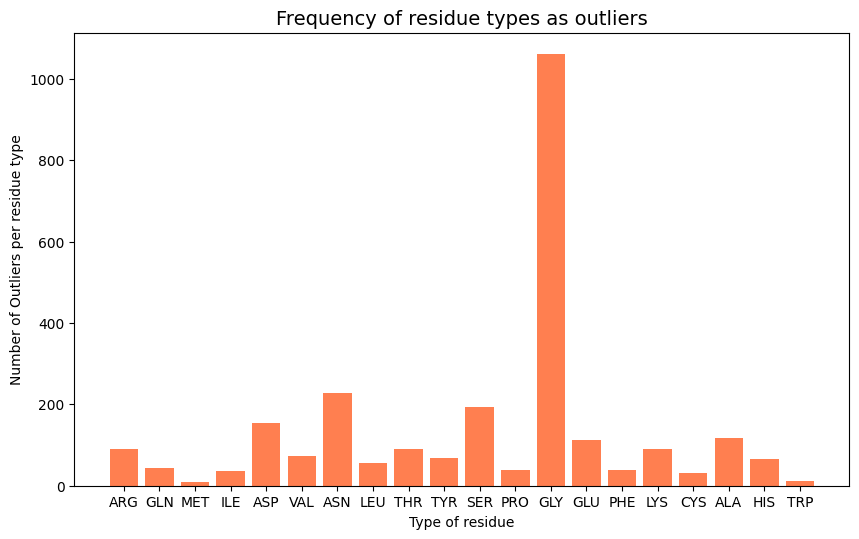

In [16]:
#create a new dataframe to plot frequency of residue types as outliers
labels = pd.Series(labels,name = "Labels")
residuenames_l = pd.concat([df['residue name'],labels], axis=1)
# Select the  outliers(noise points)
noise_points = residuenames_l[residuenames_l['Labels'] == -1]
# Get different residue names
names_residue = list(set(noise_points['residue name']))
residue_c = []

#Count in each amino acid residue type how many noise points are present
for name in names_residue:
    mask = noise_points['residue name'] == name
    count_residue = len(noise_points[mask])
    residue_c.append(count_residue)

# Plot bar chart
x_pos = [i for i, _ in enumerate(names_residue)]
plt.figure(figsize=(10, 6))
plt.bar(x_pos, residue_c,color='coral')
plt.title("Frequency of residue types as outliers", size=14)
plt.xlabel("Type of residue")
plt.ylabel("Number of Outliers per residue type")
plt.xticks(x_pos, names_residue)
plt.show()




Here we have obtained 3 clusters. The outliers that do not belong to any clusters is referred to as noise. The noise is represented using ‘ black’ color in the scatter plot. The total number of outliers as seen from the result is ‘2604’. As seen from the bar plot above, in comparison to other amino acid residue types, ‘GLY’ amino acid residue type is the significant outlier.

 **3c. Compare the clusters found by DBSCAN with those found using K-means.**

From both K-means and DBSCAN, we obtain 3 clusters. The difference we see between the both is that in K-means all the points are assigned to the clusters and there is no outliers. But DBSCAN 
distinguishes the outliers from the clusters to provide a much more evident clusters in comparison to K-means.

If we see at the plot we obtain in question **Task 2(d) (K-means)[plot 2]** and **Task3(b)(DBSCAN)** and refer to the video http://tinyurl.com/RamachandranPrincipleYouTube , we see that the upper left cluster is the beta strand, the cluster below it is the alpha helical and the cluster to the right is the ‘turn’ cluster. When visually looking at the K-means plot we see that the ‘turn’ cluster is more distributed without a noticeable cluster shape. But DBSCAN provides a more defined ‘turn’ cluster and regards the outliers as noise. We also see the difference between the alpha helical and beta strands cluster in K-means and DBSCAN(the cluster shape is noticeable but the noise is included in the cluster ) but the major difference we can point out is for the ‘turn’ cluster(no noticeable cluster shape in K-Means plot(Task 2(d)[plot2]).Therefore we can say that DBSCAN is better than K-means.

**3(d). Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or
“epsilon”).**

**Note: Previous 'eps' value =100 and 'min_values' = 10**

**3d(a) small changes in the minimum number of samples in the neighbourhood for a point to be considered as a core point**

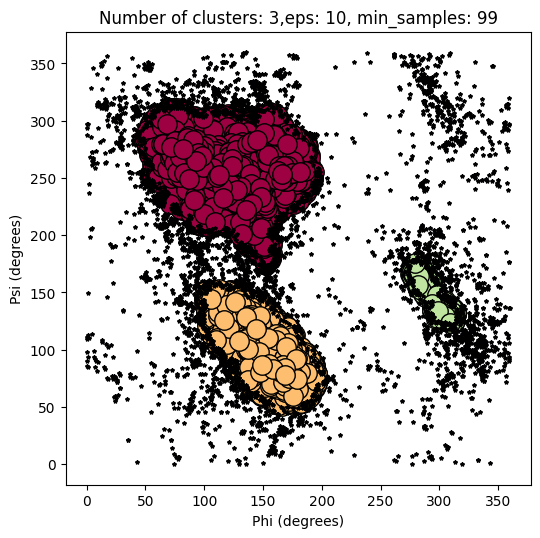

Total Number of Outliers(noise): 2599


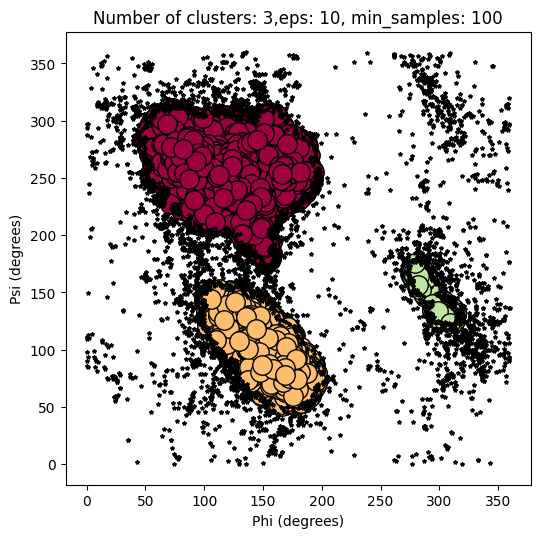

Total Number of Outliers(noise): 2604


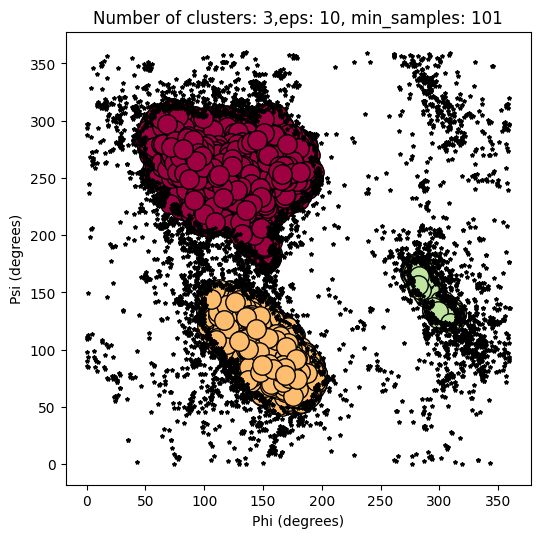

Total Number of Outliers(noise): 2647


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#DBSCAN


for i in [10]:
  for j in [99,100,101]:
      dbscan = DBSCAN(eps=i, min_samples=j).fit(rotated_data)
      core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
      core_mask[dbscan.core_sample_indices_] = True
      labels = dbscan.labels_


      no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      no_noise= list(labels).count(-1)

      # blue removed and is used for noise instead. Reference from scikit learn
      u_labels = set(labels)
      c = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(u_labels))]
      for k, col in zip(u_labels, c):
          if k == -1:
              # Blue used for noise.
              col = [0, 0, 1, 1]

          class_member_mask = (labels == k)

          xy = rotated_data[class_member_mask & core_mask]
          plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                  markeredgecolor='k', markersize=14)

          xy = rotated_data[class_member_mask & ~core_mask]
          plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
                  markeredgecolor='k', markersize=3)
      plt.rcParams.update({'figure.figsize':(6,6),'figure.dpi':100})
      plt.title('Number of clusters: {0},eps: {1}, min_samples: {2}'.format(no_clusters,i,j))
      plt.xlabel('Phi (degrees)')
      plt.ylabel('Psi (degrees)')
      plt.show()
      print('Total Number of Outliers(noise): %d' % no_noise)

**3d(b) varing the maximum distance between two samples belonging to the same neighbourhood (“eps” or
“epsilon”)** 

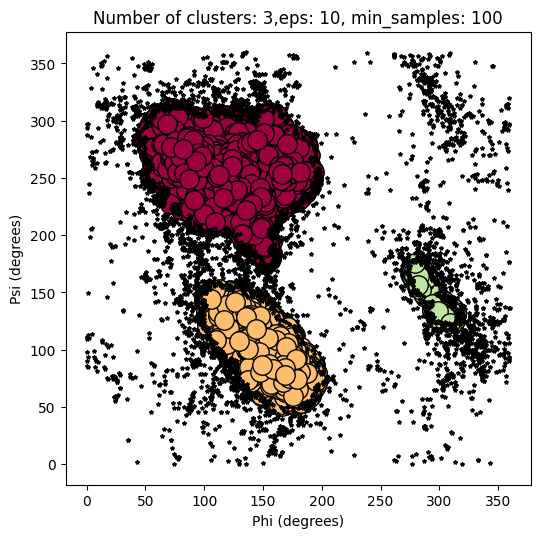

Total Number of Outliers(noise): 2604


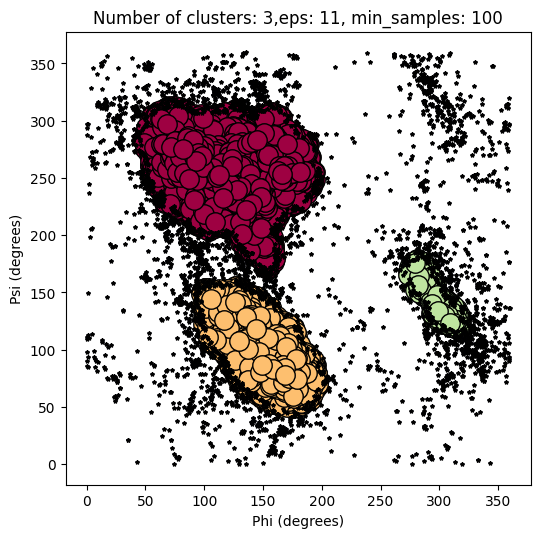

Total Number of Outliers(noise): 2275


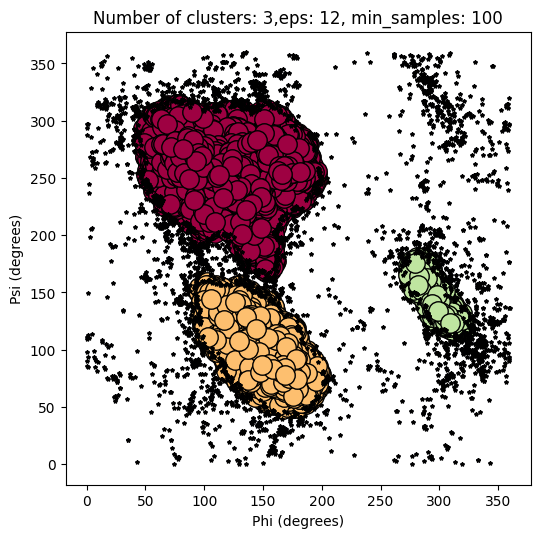

Total Number of Outliers(noise): 1959


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#DBSCAN


for i in [10,11,12]:
  for j in [100]:
      dbscan = DBSCAN(eps=i, min_samples=j).fit(rotated_data)
      core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
      core_mask[dbscan.core_sample_indices_] = True
      labels = dbscan.labels_


      no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      no_noise= list(labels).count(-1)

      # blue removed and is used for noise instead. Reference from scikit learn
      u_labels = set(labels)
      c = [plt.cm.Spectral(each)
                for each in np.linspace(0, 1, len(u_labels))]
      for k, col in zip(u_labels, c):
          if k == -1:
              # Blue used for noise.
              col = [0, 0, 1, 1]

          class_member_mask = (labels == k)

          xy = rotated_data[class_member_mask & core_mask]
          plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                  markeredgecolor='k', markersize=14)

          xy = rotated_data[class_member_mask & ~core_mask]
          plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
                  markeredgecolor='k', markersize=3)
      plt.rcParams.update({'figure.figsize':(6,6),'figure.dpi':100})
      plt.title('Number of clusters: {0},eps: {1}, min_samples: {2}'.format(no_clusters,i,j))
      plt.xlabel('Phi (degrees)')
      plt.ylabel('Psi (degrees)')
      
      plt.show()
      print('Total Number of Outliers(noise): %d' % no_noise)

For us if we consider small change would be upto plus or minus 3 units.
Here in **3(d)(a) plots** you can observe that when we vary the minimum number of samples in the neighbourhood (min_samples) by one unit, we do not find much difference or no difference.

Here in **3(d)(b) plots** you can observe that when we vary the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”) by one unit, we see that the ‘turn’ cluster(green) increases its size. So we can say that if you change the ‘eps’ we have variation in the cluster size.

So, we can say that clusters found in DBSCAN are not robust to small changes in the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).But we can say that clusters found in DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point(min_samples). We can try upto 3 units and observe as well.

If we consider the small change to be greater than +or -3 units(like maybe + or -40 units)  then maybe the clusters would  not be robust to small changes in ‘min_samples’. 
It depends on the value we consider as ‘small change’.

**4a. Use DBSCAN to cluster the data that have residue type PRO. Investigate how
the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3).**

In [19]:
df_PRO1 = df[df['residue name'].isin(['PRO'])]
df_PRO=df_PRO1[['rotated_phi','rotated_psi']]



Estimated number of clusters: 2
Estimated number of noise points: 435


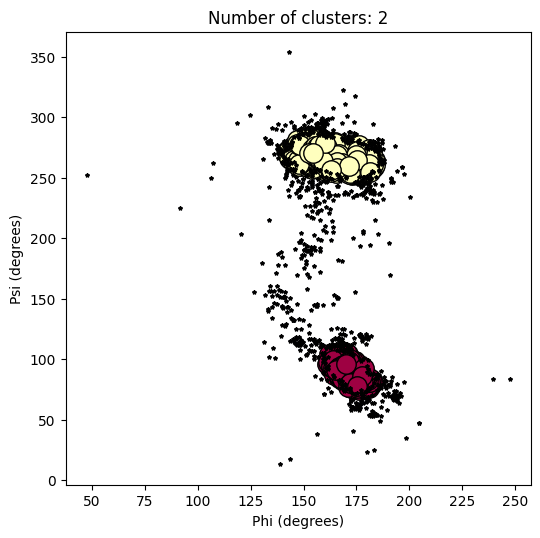

In [20]:
#clustering the PRO data 
df_PRO2=df_PRO.values
PRO_cluster = DBSCAN(eps=10, min_samples=100).fit(df_PRO2)
labels = PRO_cluster.labels_
core_mask = np.zeros_like(PRO_cluster.labels_, dtype=bool)
core_mask[PRO_cluster.core_sample_indices_] = True

#Unique labels
u_labels = set(labels)
u_labels
#number of clusters.
n_clusters_PRO = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_PRO = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_PRO)
print('Estimated number of noise points: %d' % n_noise_PRO)

#plot the PRO amino acid type 
c = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(u_labels))]
for k, col in zip(u_labels, c):
    if k == -1:
        # Blue used for noise.
        col = [0, 0, 1, 1]

    class_member_mask = (labels == k)

    xy = df_PRO2[class_member_mask & core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_PRO2[class_member_mask & ~core_mask]
    plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.rcParams.update({'figure.figsize':(6,6),'figure.dpi':100})
plt.title('Number of clusters: %d' % n_clusters_PRO)
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.show()

When comparing the plot for PRO amino acid residue type(Task 4(a)plot) and Task 3(b)plot, it is evident that the clusters seen in Task 4(a)plot have datapoint belonging  to the ‘beta strand’ and the ‘alpha helical’ clusters seen in Task 3(b) and PRO residue type have no turns as we observe that the ‘turn’ cluster is missing.


**4b.DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters.** 

In [21]:
#extracting the rotated GLY values from the dataframe
df_GLY1 = df[df['residue name'].isin(['GLY'])]

df_GLY= df_GLY1[['rotated_phi','rotated_psi']] 





**Plotting with previous paramter values('eps' and 'min_samples')**

Number of clusters: 1
Number of noise points: 2030


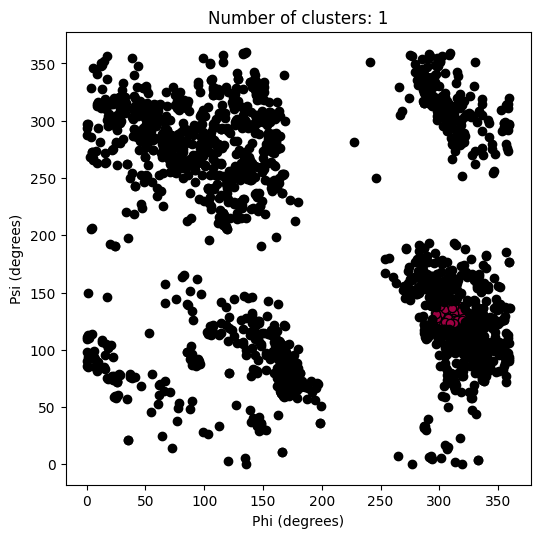

In [22]:
#clustering the GLY data 
df_GLY2=df_GLY.values
GLY_cluster = DBSCAN(eps=10, min_samples=100).fit(df_GLY2)
labels = GLY_cluster.labels_
core_mask = np.zeros_like(GLY_cluster.labels_, dtype=bool)
core_mask[GLY_cluster.core_sample_indices_] = True

#Unique labels
u_labels = set(labels)
u_labels
#number of clusters.
n_clusters_GLY = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_GLY = list(labels).count(-1)

print('Number of clusters: %d' % n_clusters_GLY)
print('Number of noise points: %d' % n_noise_GLY)

#plot the GLY amino acid type 
c = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(u_labels))]
for k, col in zip(u_labels, c):
    if k == -1:
        #Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_GLY2[class_member_mask & core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_GLY2[class_member_mask & ~core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.rcParams.update({'figure.figsize':(6,6),'figure.dpi':100})
plt.title('Number of clusters: %d'% n_clusters_GLY)
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.show()

**adjusting the eps and min_samples values(parameters) to get clusters**

Number of clusters: 4
Number of noise points: 270


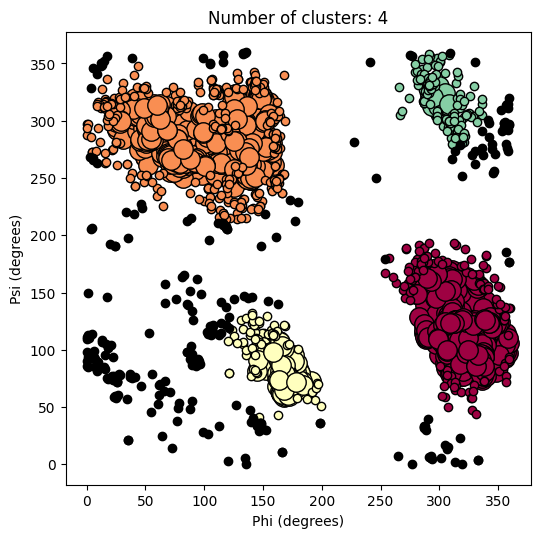

In [23]:
#clustering the GLY data 
df_GLY2=df_GLY.values
GLY_cluster = DBSCAN(eps=30, min_samples=120).fit(df_GLY2)
labels = GLY_cluster.labels_
core_mask = np.zeros_like(GLY_cluster.labels_, dtype=bool)
core_mask[GLY_cluster.core_sample_indices_] = True

#Unique labels
u_labels = set(labels)
u_labels
#number of clusters.
n_clusters_GLY = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_GLY = list(labels).count(-1)

print('Number of clusters: %d' % n_clusters_GLY)
print('Number of noise points: %d' % n_noise_GLY)

#plot the GLY amino acid type 
c = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(u_labels))]
for k, col in zip(u_labels, c):
    if k == -1:
        #Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_GLY2[class_member_mask & core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_GLY2[class_member_mask & ~core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.rcParams.update({'figure.figsize':(6,6),'figure.dpi':100})
plt.title('Number of clusters: %d'% n_clusters_GLY)
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.show()

Here before adjusting the ‘eps’ and ‘min_samples’ that is when using the same values for these two parameters as before we see that there is only 1 cluster and other datapoint are classified as noise. This happens as the datapoint are too spread out and is difficult to form clusters with the same parameter values.
Here by trail and error we are adjusting the parameters ‘eps’ and ‘min_samples’  to form a reasonable number clusters.Here after setting the parameters ‘eps’ = 30 and ‘min_samples’ = 120 we get 4 clusters.
Comparing Task 4(b) plot with the Task 3(b)(general cluster plot) plot , it is similar to it but we can see that the outlier at the upper right corner is also taken as an additional cluster. It is because the ‘GLY’ residue type is mostly distributed and its presence is also high in datapoints regarded as outliers. Therefore we find an additional cluster. But GLY residue has turns which was not present in PRO residue type.
